Advanced Validation Assignment

In [1]:
import pandas as dp
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df=dp.read_csv("breast_cancer.csv")

In [3]:
df

,Unnamed: 0,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
0,0,1000025,5,1,1,1,2,1,3,1,1,0
1,1,1002945,5,4,4,5,7,10,3,2,1,0
2,2,1015425,3,1,1,1,2,2,3,1,1,0
3,3,1016277,6,8,8,1,3,4,3,7,1,0
4,4,1017023,4,1,1,3,2,1,3,1,1,0
5,5,1017122,8,10,10,8,7,10,9,7,1,1
6,6,1018099,1,1,1,1,2,10,3,1,1,0
7,7,1018561,2,1,2,1,2,1,3,1,1,0
8,8,1033078,2,1,1,1,2,1,1,1,5,0
9,9,1033078,4,2,1,1,2,1,2,1,1,0


Extracting data which has malignant tumor

In [4]:
df[df.malignant==1]

,Unnamed: 0,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
5,5,1017122,8,10,10,8,7,10,9,7,1,1
12,12,1041801,5,3,3,3,2,3,4,4,1,1
14,14,1044572,8,7,5,10,7,9,5,5,4,1
15,15,1047630,7,4,6,4,6,1,4,3,1,1
18,18,1050670,10,7,7,6,4,10,4,1,2,1
20,20,1054590,7,3,2,10,5,10,5,4,4,1
21,21,1054593,10,5,5,3,6,7,7,10,1,1
23,23,1057013,8,4,5,1,2,-1,7,3,1,1
25,25,1065726,5,2,3,4,2,7,3,6,1,1
32,32,1072179,10,7,7,3,8,5,7,4,3,1


Removing unwanted columns

In [5]:
df.columns

Index([u'Unnamed: 0', u'id number', u'clump_thickness',
       u'uniformity_of_cell_size', u'uniformity_of_cell_shape',
       u'marginal_adhesion', u'epithelial_cell_size', u'bare_nuclei',
       u'bland_chromatin', u'normal_nucleoli', u'mitoses', u'malignant'],
      dtype='object')

In [6]:
df=df.drop(['Unnamed: 0','id number'],axis = 1)

In [7]:
Y=df.pop("malignant") 

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(df, Y, test_size=.2, random_state=42)

In [9]:
n_estimators = [300,400,500]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [1,2,3,4]


rfc = RandomForestClassifier(n_jobs=1)

estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)

In [10]:
estimator.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [1, 2, 3, 4], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [11]:
GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [1, 2, 3, 4], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [1, 2, 3, 4], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [12]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
bestrfc=estimator.best_estimator_

Calculating the accuracy of the model

In [14]:
accuracy = accuracy_score(Y_test, bestrfc.predict(X_test))
print accuracy

0.964285714286


In [15]:
Y_hat=bestrfc.predict(X_test)

In [16]:
Y_hat

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0], dtype=int64)

In [17]:
correct = 0
total = Y_test.shape[0]
for pred_val, truth_val in zip(Y_hat, Y_test):
    if pred_val == truth_val:
        correct +=1

print correct / float(total)

0.964285714286


Printing the Classification Report

In [18]:
print classification_report(Y_test, bestrfc.predict(X_test))

             precision    recall  f1-score   support

          0       0.97      0.98      0.97        95
          1       0.95      0.93      0.94        45

avg / total       0.96      0.96      0.96       140



In [19]:
print confusion_matrix(Y_test, bestrfc.predict(X_test))

[[93  2]
 [ 3 42]]


In [20]:
 #Number of True Positives(tp)=42
#Number of False Negatives(fn)= 3
 #Number of False Positives(fp)=2

#### Precision=tp/(tp+fp)
####                 =42/(42+2)
####                 =0.9545

#### Recall= tp/(tp+fn)
####           =42/(42+3)
####           =0.9333

### Calculating the ROC of 

In [22]:
roc = roc_auc_score(Y_test, bestrfc.predict_proba(X_test)[:,1])
print roc

0.995555555556


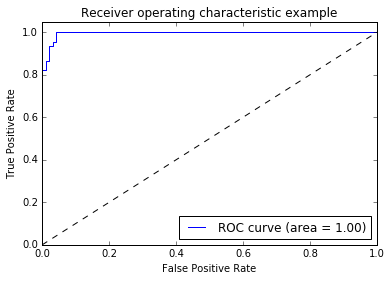

In [23]:
fpr, tpr, thresholds = roc_curve(Y_test, bestrfc.predict_proba(X_test)[:,1])
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Implementing K-Fold Cross Validation

In [27]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(bestrfc, df, Y, cv=10)

print scores

[ 0.91549296  0.97142857  0.97142857  0.91428571  0.98571429  0.97142857
  0.97142857  0.98571429  0.98550725  0.98550725]


In [29]:
mean= scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean - ci
upper_bound = mean + ci

print "Score is %f +/-  %f" % (mean, ci)

Score is 0.965794 +/-  0.018764


Observations:-

##### K-Fold Cv score is from 0.94703 to 0.984558
##### Single Handout AUC Score is 0.964285714286

Conclusion:-

Thus we see that the the AUC score is in the range of K-Fold CV score

Accuracy is 0.964285714286

Precision:- 0.9545 & Recall:- 0.9333